In [4]:
# !pip install openpyxl

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df =pd.read_excel('Vigitel-2023-peso-rake.xlsx')
df.head()

,chave,tipo_fone,replica,cidade,ano,q6,q7,q8a,q8b,q9,...,depressao,ind_med_has,med_has,trat_med_has,ind_med_db,med_db,insulina,trat_med_db,ind_med_depr,trat_med_depr
0,159775260937,CELULAR,12,5,2023,18,1,5,2.0,62,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,459610290826,CELULAR,18,12,2023,23,1,5,2.0,96,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,439521590847,CELULAR,5,4,2023,32,1,4,8.0,93,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119768260943,CELULAR,15,5,2023,38,1,8,NaN,777,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,349242860840,CELULAR,17,10,2023,42,1,4,8.0,89,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Distribuição da prática de atividade física por faixa etária
physical_activity_by_age = (
    df_limpo
    .groupby(['faixa_etaria', 'exercicio_físico'], observed=True)
    .size()
    .unstack(fill_value=0)
)

print("Distribution of physical activity across age groups:")
print(physical_activity_by_age)

# Filtrando apenas quem pratica exercício
df_exercicio_only = df_limpo[df_limpo['exercicio_físico'] == 1].copy()

# Tipos de exercícios por faixa etária entre quem pratica
exercise_type_by_age = (
    df_exercicio_only
    .groupby(['faixa_etaria', 'qual_exercicio'], observed=True)
    .size()
    .unstack(fill_value=0)
)

print("\nTypes of exercises prevalent in each age group among those who exercise:")
print(exercise_type_by_age)


Distribution of physical activity across age groups:
exercicio_físico     1     2
faixa_etaria                
10-19              539   191
20-29             2058   944
30-39             2308  1465
40-49             2361  1683
50-59             2055  1592
60-69             1807  1557
70-79             1150  1106
80-89              346   458
90-99               14    53
100+                 1     2

Types of exercises prevalent in each age group among those who exercise:
qual_exercicio  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
faixa_etaria                                                                 
10-19             74     7    45     5   202    11     0    16     3    12   
20-29            371    29   174    17   824    37     2    60    22    48   
30-39            637    27   142    17   764    46     4    84    17    32   
40-49            902    44   126    17   563    46    16   104    32    31   
50-59           1054    45    78     8   326    42    50 

In [27]:
blood_pressure_by_age = (
    df_limpo
    .groupby(['faixa_etaria', 'pressao_alta'], observed=True)
    .size()
    .unstack(fill_value=0)
)

print("Prevalence of high blood pressure across different age groups:")
print(blood_pressure_by_age)


Prevalence of high blood pressure across different age groups:
pressao_alta   1     2    777
faixa_etaria                 
10-19           25   705    0
20-29          232  2766    4
30-39          507  3263    3
40-49         1060  2982    2
50-59         1571  2075    1
60-69         1925  1437    2
70-79         1513   743    0
80-89          530   273    1
90-99           40    27    0
100+             2     1    0


In [25]:
physical_activity_blood_pressure = df_limpo.groupby(['exercicio_físico', 'pressao_alta']).size().unstack(fill_value=0)
print("Relationship between physical activity and high blood pressure:")
print(physical_activity_blood_pressure)

Relationship between physical activity and high blood pressure:
pressao_alta       1     2    777
exercicio_físico                 
1                 3754  8876    9
2                 3651  5396    4


In [28]:
df_pressao_alta = df_limpo[df_limpo['pressao_alta'] == 1].copy()

exercise_type_high_bp = df_pressao_alta.groupby('qual_exercicio').size().sort_values(ascending=False)

print("Types of exercises practiced by people with high blood pressure:")
print(exercise_type_high_bp)

Types of exercises practiced by people with high blood pressure:
qual_exercicio
1.0     1955
5.0      437
8.0      319
17.0     224
11.0     189
7.0      171
3.0      103
2.0       85
6.0       80
12.0      66
16.0      41
9.0       36
4.0       14
10.0      12
14.0      12
15.0      10
dtype: int64


In [31]:
import matplotlib.pyplot as plt

# Paleta de cores
cores_claras = [
    '#A2D9FF', '#A3D9A5', '#D1D8E0', '#FFA07A', '#D9A2FF',
    '#FFD9A2', '#A2F0FF', '#FFDAA2', '#A2FFD9', '#D1FFDA'
]

# Função genérica para criar gráficos de barra
def plot_bar(df, title, xlabel, ylabel, rotation=45, legend_title=None, figsize=(12, 6)):
    df.plot(
        kind='bar',
        figsize=figsize,
        color=cores_claras[:len(df.columns)]  # só usa o número necessário de cores
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha='right')
    
    if legend_title:
        plt.legend(title=legend_title)
    else:
        plt.legend().set_visible(False)

    plt.tight_layout()
    plt.show()

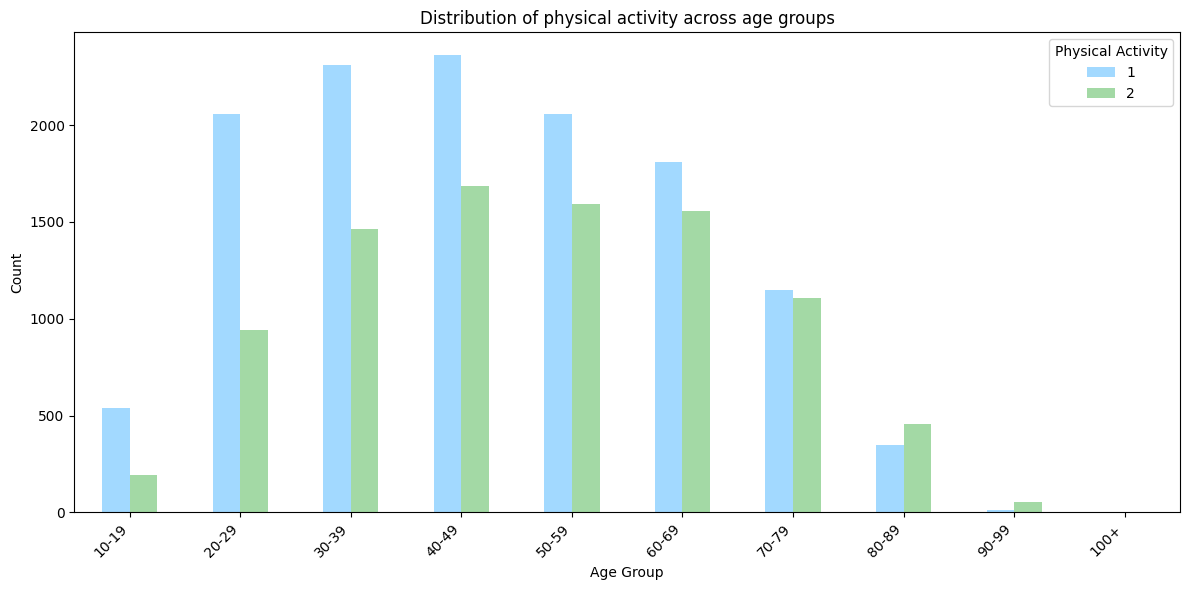

In [32]:
plot_bar(
    df=physical_activity_by_age,
    title='Distribution of physical activity across age groups',
    xlabel='Age Group',
    ylabel='Count',
    legend_title='Physical Activity'
)

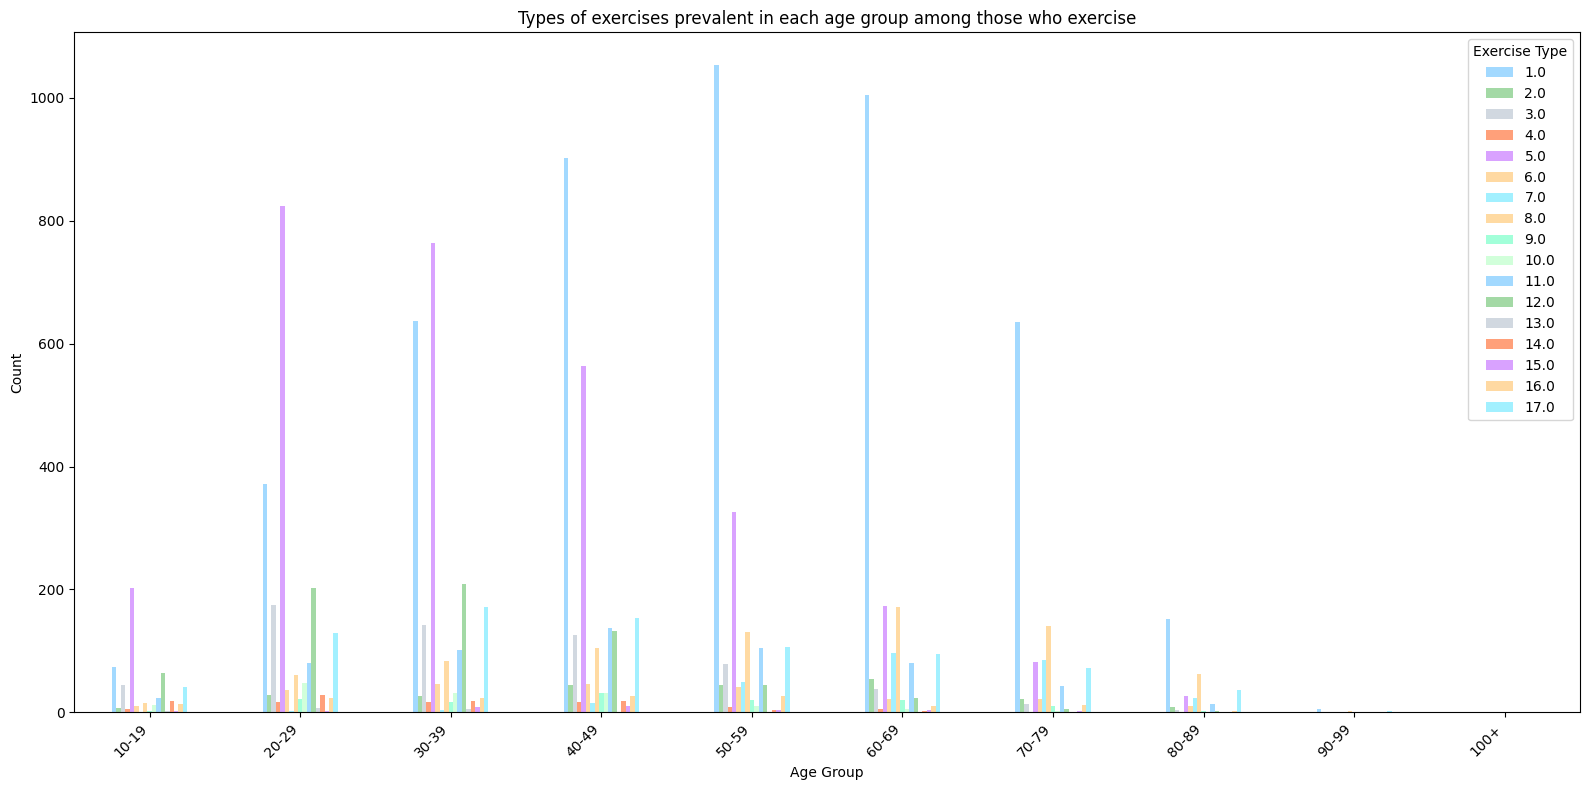

In [34]:
plot_bar(
    df=exercise_type_by_age,
    title='Types of exercises prevalent in each age group among those who exercise',
    xlabel='Age Group',
    ylabel='Count',
    figsize=(16, 8),
    legend_title='Exercise Type'
)

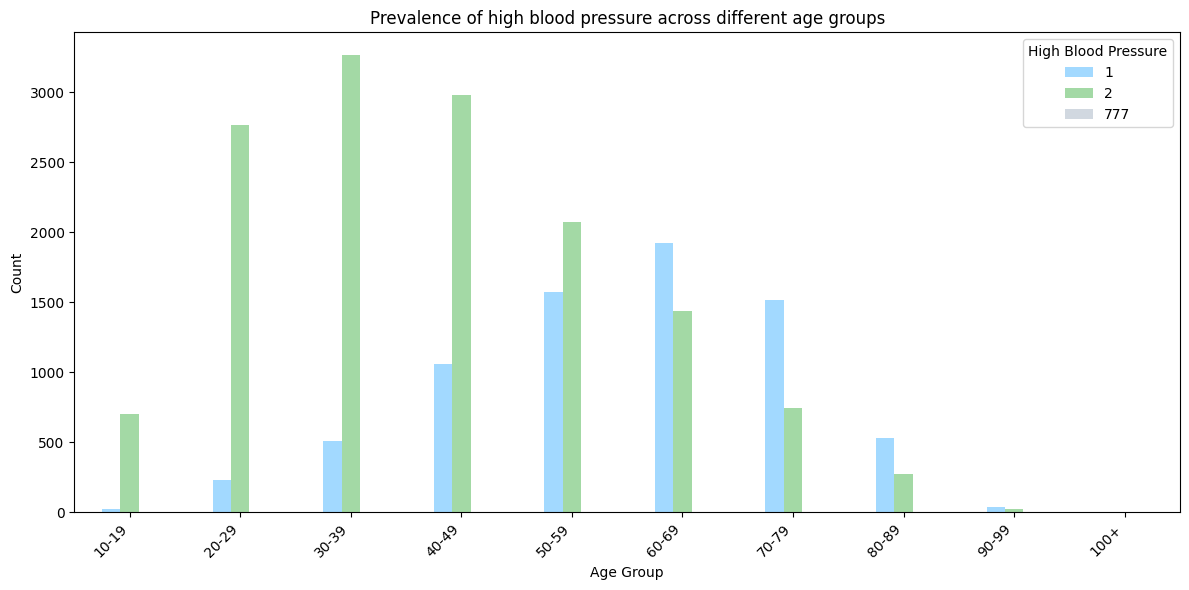

In [35]:
plot_bar(
    df=blood_pressure_by_age,
    title='Prevalence of high blood pressure across different age groups',
    xlabel='Age Group',
    ylabel='Count',
    legend_title='High Blood Pressure'
)

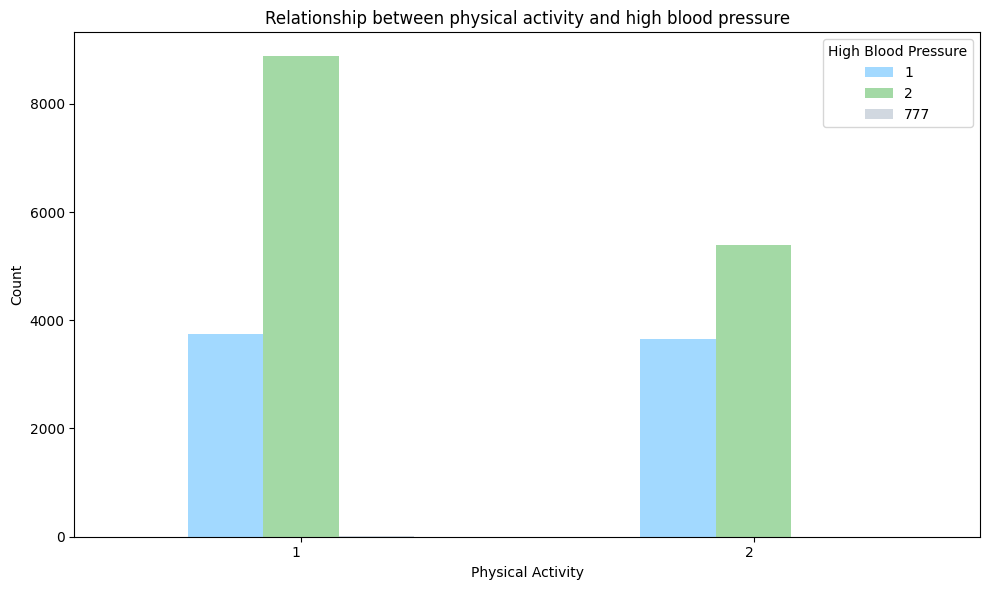

In [36]:
plot_bar(
    df=physical_activity_blood_pressure,
    title='Relationship between physical activity and high blood pressure',
    xlabel='Physical Activity',
    ylabel='Count',
    rotation=0,
    legend_title='High Blood Pressure',
    figsize=(10, 6)
)

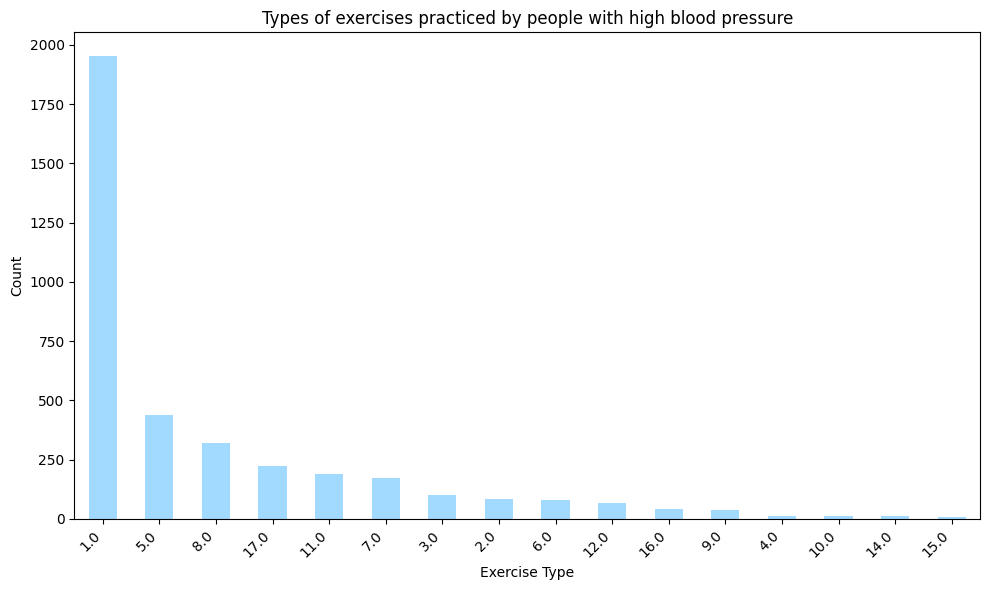

In [38]:
df_to_plot = exercise_type_high_bp.to_frame()

plot_bar(
    df=df_to_plot,
    title='Types of exercises practiced by people with high blood pressure',
    xlabel='Exercise Type',
    ylabel='Count',
    figsize=(10, 6)
)

In [10]:
desired_column=['cidade','q6','q7','q8a','q42', 'q43a','q44','q45','q46','q47','q48','q59c','q74','q75','q76','q88','fet']
df_limpo = pd.DataFrame(columns = desired_column, data=df)
df_limpo.head()


,cidade,q6,q7,q8a,q42,q43a,q44,q45,q46,q47,q48,q59c,q74,q75,q76,q88,fet
0,5,18,1,5,1,5.0,1.0,1.0,4.0,2,NaN,7.0,3,2,2,1,1
1,12,23,1,5,1,3.0,1.0,4.0,7.0,1,2.0,4.0,2,2,2,1,1
2,4,32,1,4,1,12.0,1.0,1.0,7.0,1,1.0,3.0,2,2,2,3,2
3,5,38,1,8,2,NaN,NaN,NaN,NaN,1,2.0,NaN,2,2,2,3,3
4,10,42,1,4,2,NaN,NaN,NaN,NaN,1,1.0,1.0,2,2,2,3,3


In [11]:
novos_nomes = ['nome_cidade', 'idade', 'sexo', 'grau_escolaridade', 'exercicio_físico',
               'qual_exercicio', 'pratica_1_vez_na_semana', 'freq_exercicio', 'duracao', 'trabalha',
               'anda_pe', 'uso_tem_telas', 'est_saude', 'pressao_alta', 'diabete',
               'plano_saude', 'faixa_etaria']
df_limpo.columns = novos_nomes
df_limpo.head()

,nome_cidade,idade,sexo,grau_escolaridade,exercicio_físico,qual_exercicio,pratica_1_vez_na_semana,freq_exercicio,duracao,trabalha,anda_pe,uso_tem_telas,est_saude,pressao_alta,diabete,plano_saude,faixa_etaria
0,5,18,1,5,1,5.0,1.0,1.0,4.0,2,NaN,7.0,3,2,2,1,1
1,12,23,1,5,1,3.0,1.0,4.0,7.0,1,2.0,4.0,2,2,2,1,1
2,4,32,1,4,1,12.0,1.0,1.0,7.0,1,1.0,3.0,2,2,2,3,2
3,5,38,1,8,2,NaN,NaN,NaN,NaN,1,2.0,NaN,2,2,2,3,3
4,10,42,1,4,2,NaN,NaN,NaN,NaN,1,1.0,1.0,2,2,2,3,3


In [12]:
df_limpo.isnull().sum()

nome_cidade                   0
idade                         0
sexo                          0
grau_escolaridade             0
exercicio_físico              0
qual_exercicio             9051
pratica_1_vez_na_semana    9051
freq_exercicio             9776
duracao                    9776
trabalha                      0
anda_pe                    9411
uso_tem_telas              6128
est_saude                     0
pressao_alta                  0
diabete                       0
plano_saude                   0
faixa_etaria                  0
dtype: int64

In [13]:
df_limpo['idade'].unique()

array([ 18,  23,  32,  38,  42,  30,  43,  20,  39,  44,  35,  26,  29,
        27,  31,  33,  41,  28,  25,  40,  34,  22,  36,  37,  21,  19,
        24,  51,  64,  58,  61,  55,  57,  45,  52,  49,  47,  54,  48,
        46,  50,  53,  59,  56,  60,  62,  63,  94,  75,  65,  78,  71,
        77,  70,  85,  84,  66,  89,  73,  74,  72,  80,  67,  86,  79,
        76,  83,  68,  81,  82,  69,  88,  91,  93,  87,  92,  90, 104,
        95, 102,  96,  97, 100,  98, 109], dtype=int64)

In [14]:
df_limpo.duplicated().sum()

59

In [16]:
df_f_ezercico = df_limpo[(df_limpo['exercicio_físico'] == 1)].copy()

In [17]:
df_f_ezercico

,nome_cidade,idade,sexo,grau_escolaridade,exercicio_físico,qual_exercicio,pratica_1_vez_na_semana,freq_exercicio,duracao,trabalha,anda_pe,uso_tem_telas,est_saude,pressao_alta,diabete,plano_saude,faixa_etaria
0,5,18,1,5,1,5.0,1.0,1.0,4.0,2,NaN,7.0,3,2,2,1,1
1,12,23,1,5,1,3.0,1.0,4.0,7.0,1,2.0,4.0,2,2,2,1,1
2,4,32,1,4,1,12.0,1.0,1.0,7.0,1,1.0,3.0,2,2,2,3,2
6,1,30,1,4,1,12.0,1.0,1.0,7.0,1,1.0,2.0,1,2,2,3,2
7,20,18,1,3,1,8.0,1.0,4.0,7.0,1,2.0,2.0,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21679,26,69,2,7,1,1.0,1.0,2.0,5.0,2,NaN,1.0,2,2,2,1,6
21681,21,66,2,7,1,1.0,1.0,1.0,4.0,2,NaN,NaN,2,1,1,1,6
21683,3,72,2,6,1,1.0,1.0,3.0,7.0,2,NaN,NaN,1,2,2,1,6
21685,24,65,2,6,1,17.0,1.0,2.0,2.0,2,NaN,2.0,2,1,2,1,6


In [18]:
resultado = df_f_ezercico.groupby(['faixa_etaria','trabalha']).size().unstack(fill_value=0)
print(resultado)

trabalha         1     2
faixa_etaria            
1              880   435
2             1726   392
3             1940   460
4             1649   580
5             1056   993
6              481  2047


In [19]:
# Passo 1: Criar a faixa etária de 10 em 10 anos
# Ajustar os bins e labels para garantir que haja 1 a menos label que bins
faixa_etaria = pd.cut(df_limpo['idade'], bins=range(0, 111, 10),
                      labels=[f'{i}-{i+9}' for i in range(0, 100, 10)] + ['100+'])

# Adicionar a coluna de faixa etária no DataFrame
df_limpo['faixa_etaria'] = faixa_etaria


# Passo 3: Calcular a moda das faixas etárias e a prática de exercício físico
moda_faixa_etaria = df_limpo['faixa_etaria'].mode()[0]  # A moda da faixa etária
moda_exercicio_físico = df_limpo['exercicio_físico'].mode()[0]  # A moda da prática de exercício físico


print(f'Moda da faixa etária: {moda_faixa_etaria}')
print(f'Moda da prática de exercício físico: {moda_exercicio_físico}')


Moda da faixa etária: 40-49
Moda da prática de exercício físico: 1


In [20]:
moda_tipo_exercicio_físico = df_limpo['grau_escolaridade'].mode()[0]  # A moda da prática de exercício físico

In [21]:
print(f'Moda do tipo da prática de exercício físico: {moda_exercicio_físico}')

Moda do tipo da prática de exercício físico: 1


In [22]:
total_registros = len(df_limpo)
print(total_registros)

21690


# Task
Analyze the dataset in the file "dados_anamnese.xlsx" to determine the physical activities performed by each age group, identify if individuals in each age group have high blood pressure, and generate a correlation matrix.

## Data preparation

### Subtask:
Ensure the 'exercicio_físico', 'qual_exercicio', 'faixa_etaria', and 'pressao_alta' columns are in the correct format for analysis. This might involve handling missing values and converting data types if necessary.


**Reasoning**:
Examine the data types and check for missing values in the specified columns to determine the required cleaning steps.



In [39]:
df_limpo[['exercicio_físico', 'qual_exercicio', 'faixa_etaria', 'pressao_alta']].info()
df_limpo[['exercicio_físico', 'qual_exercicio', 'faixa_etaria', 'pressao_alta']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21690 entries, 0 to 21689
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   exercicio_físico  21690 non-null  int64   
 1   qual_exercicio    12639 non-null  float64 
 2   faixa_etaria      21690 non-null  category
 3   pressao_alta      21690 non-null  int64   
dtypes: category(1), float64(1), int64(2)
memory usage: 530.0 KB


exercicio_físico       0
qual_exercicio      9051
faixa_etaria           0
pressao_alta           0
dtype: int64

**Reasoning**:
Based on the output, 'qual_exercicio' has missing values and is a float64, while the other columns are suitable for analysis. I will fill the missing values in 'qual_exercicio' with a placeholder value indicating no exercise was performed, and convert it to integer type.



In [40]:
df_limpo['qual_exercicio'] = df_limpo['qual_exercicio'].fillna(0).astype(int)
df_limpo[['exercicio_físico', 'qual_exercicio', 'faixa_etaria', 'pressao_alta']].info()
df_limpo[['exercicio_físico', 'qual_exercicio', 'faixa_etaria', 'pressao_alta']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21690 entries, 0 to 21689
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   exercicio_físico  21690 non-null  int64   
 1   qual_exercicio    21690 non-null  int32   
 2   faixa_etaria      21690 non-null  category
 3   pressao_alta      21690 non-null  int64   
dtypes: category(1), int32(1), int64(2)
memory usage: 445.3 KB


exercicio_físico    0
qual_exercicio      0
faixa_etaria        0
pressao_alta        0
dtype: int64

## Analyze physical activity by age group

### Subtask:
Group the data by 'faixa_etaria' and 'exercicio_físico' to understand the distribution of physical activity across different age groups. Further analyze the 'qual_exercicio' column within each age group to identify the specific types of activities.


In [42]:
# Group by age group and physical activity (sem warning: observed=True)
physical_activity_by_age = (
    df_limpo
    .groupby(['faixa_etaria', 'exercicio_físico'], observed=True)
    .size()
    .unstack(fill_value=0)
)
print("Distribution of physical activity across age groups:")
print(physical_activity_by_age)

# Filter for those who exercise
df_exercicio_only = df_limpo[df_limpo['exercicio_físico'] == 1].copy()

# Group by age group and type of exercise for those who exercise (sem warning: observed=True)
exercise_type_by_age = (
    df_exercicio_only
    .groupby(['faixa_etaria', 'qual_exercicio'], observed=True)
    .size()
    .unstack(fill_value=0)
)
print("\nTypes of exercises prevalent in each age group among those who exercise:")
display(exercise_type_by_age.head(10))

Distribution of physical activity across age groups:
exercicio_físico     1     2
faixa_etaria                
10-19              539   191
20-29             2058   944
30-39             2308  1465
40-49             2361  1683
50-59             2055  1592
60-69             1807  1557
70-79             1150  1106
80-89              346   458
90-99               14    53
100+                 1     2

Types of exercises prevalent in each age group among those who exercise:


qual_exercicio,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
faixa_etaria,,,,,,,,,,,,,,,,,
10-19,74,7,45,5,202,11,0,16,3,12,23,64,2,18,2,13,42
20-29,371,29,174,17,824,37,2,60,22,48,80,203,7,28,3,24,129
30-39,637,27,142,17,764,46,4,84,17,32,102,209,5,18,9,23,172
40-49,902,44,126,17,563,46,16,104,32,31,138,132,1,19,10,27,153
50-59,1054,45,78,8,326,42,50,130,20,10,105,45,0,4,4,27,107
60-69,1005,55,38,6,173,22,96,171,20,6,80,24,0,2,4,10,95
70-79,635,21,14,0,82,22,85,141,11,3,43,5,0,1,3,12,72
80-89,152,9,4,1,27,10,23,63,3,0,14,2,0,0,0,2,36
90-99,5,0,1,0,1,0,1,3,0,0,1,0,0,0,0,0,2


**Reasoning**:
Group the DataFrame by 'faixa_etaria' and 'exercicio_físico' to count the occurrences in each group and then filter for individuals who exercise and group by 'faixa_etaria' and 'qual_exercicio' to count the occurrences in each group.



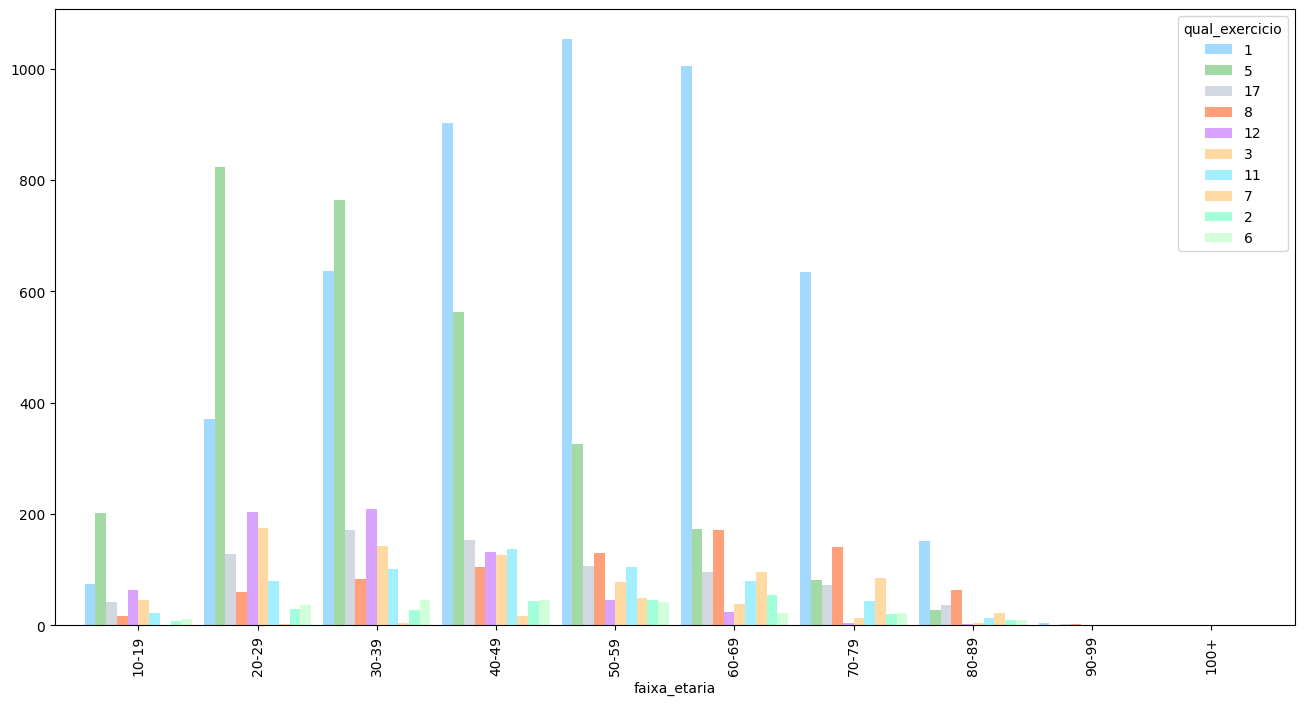

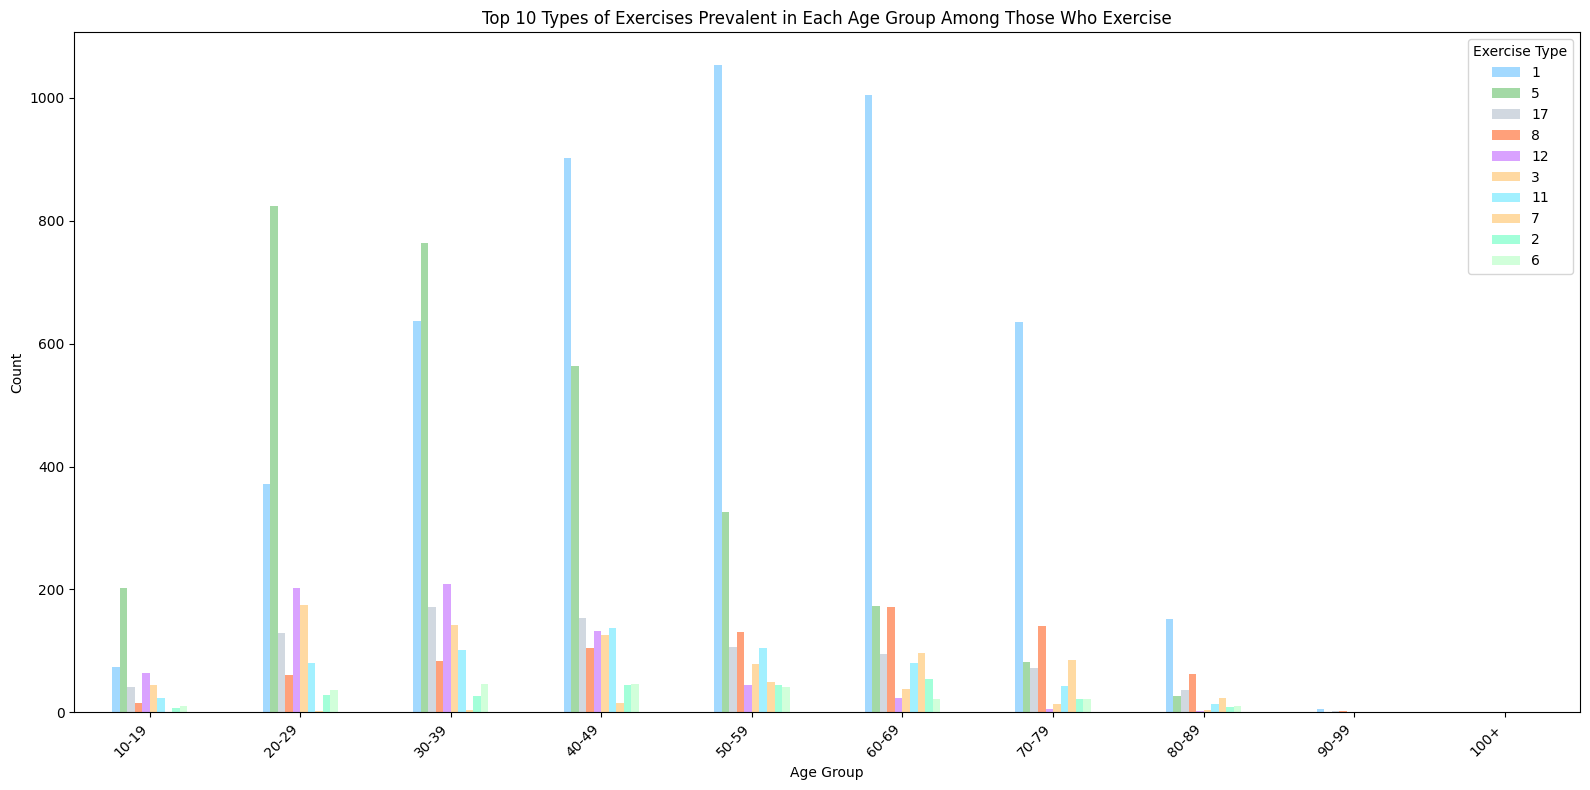

In [43]:
import matplotlib.pyplot as plt

# Paleta de cores claras
cores_claras = [
    '#A2D9FF', '#A3D9A5', '#D1D8E0', '#FFA07A', '#D9A2FF',
    '#FFD9A2', '#A2F0FF', '#FFDAA2', '#A2FFD9', '#D1FFDA'
]

# Select top 10 exercise types
top_10_exercises = exercise_type_by_age.sum().sort_values(ascending=False).head(10).index
exercise_type_by_age_top10 = exercise_type_by_age[top_10_exercises]
exercise_type_by_age_top10.plot(kind='bar', figsize=(16, 8), color=cores_claras, width=0.9)

# Plotting types of exercises prevalent in each age group (top 10)
exercise_type_by_age_top10.plot(kind='bar', figsize=(16, 8), color=cores_claras)
plt.title('Top 10 Types of Exercises Prevalent in Each Age Group Among Those Who Exercise')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Exercise Type')
plt.tight_layout()
plt.savefig('pratica_de_atividade.png', dpi=300)
plt.show()

## Generate Correlation Matrix

### Subtask:
Calculate and visualize a correlation matrix for relevant numerical columns in the dataset to understand the relationships between different variables, including age, physical activity indicators (if numerical), and blood pressure.

**Reasoning**:
Select the relevant numerical columns from the DataFrame, calculate the correlation matrix, and then visualize it using a heatmap for better interpretation.

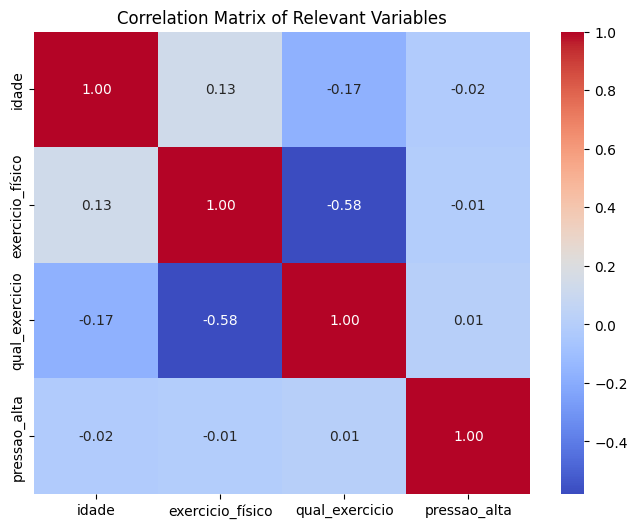

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns
df_relevant = df_limpo[['idade', 'exercicio_físico', 'qual_exercicio', 'pressao_alta']]

# Calculate the correlation matrix
correlation_matrix = df_relevant.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Variables')
plt.show()

## Analyze high blood pressure by age group

### Subtask:
Group the data by 'faixa_etaria' and 'pressao_alta' to understand the prevalence of high blood pressure across different age groups.


**Reasoning**:
Group the data by 'faixa_etaria' and 'pressao_alta' and count the occurrences to understand the prevalence of high blood pressure across different age groups, then print the result.



## Analyze physical activity and high blood pressure

### Subtask:
Investigate the relationship between physical activity ('exercicio_físico') and high blood pressure ('pressao_alta'). This could involve grouping by both columns and observing the counts.


**Reasoning**:
Group the data by physical activity and blood pressure and count the occurrences to investigate the relationship.



In [47]:
# Group by age group and physical activity
physical_activity_by_age = df_limpo.groupby(
    ['faixa_etaria', 'exercicio_físico'], observed=True  # <--- corrigido
).size().unstack(fill_value=0)
print("Distribution of physical activity across age groups:")
print(physical_activity_by_age)

# Filter for those who exercise
df_exercicio_only = df_limpo[df_limpo['exercicio_físico'] == 1].copy()

# Group by age group and type of exercise for those who exercise
exercise_type_by_age = df_exercicio_only.groupby(
    ['faixa_etaria', 'qual_exercicio'], observed=True  # <--- corrigido
).size().unstack(fill_value=0)
print("\nTypes of exercises prevalent in each age group among those who exercise:")
display(exercise_type_by_age.head(10))

Distribution of physical activity across age groups:
exercicio_físico     1     2
faixa_etaria                
10-19              539   191
20-29             2058   944
30-39             2308  1465
40-49             2361  1683
50-59             2055  1592
60-69             1807  1557
70-79             1150  1106
80-89              346   458
90-99               14    53
100+                 1     2

Types of exercises prevalent in each age group among those who exercise:


qual_exercicio,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
faixa_etaria,,,,,,,,,,,,,,,,,
10-19,74,7,45,5,202,11,0,16,3,12,23,64,2,18,2,13,42
20-29,371,29,174,17,824,37,2,60,22,48,80,203,7,28,3,24,129
30-39,637,27,142,17,764,46,4,84,17,32,102,209,5,18,9,23,172
40-49,902,44,126,17,563,46,16,104,32,31,138,132,1,19,10,27,153
50-59,1054,45,78,8,326,42,50,130,20,10,105,45,0,4,4,27,107
60-69,1005,55,38,6,173,22,96,171,20,6,80,24,0,2,4,10,95
70-79,635,21,14,0,82,22,85,141,11,3,43,5,0,1,3,12,72
80-89,152,9,4,1,27,10,23,63,3,0,14,2,0,0,0,2,36
90-99,5,0,1,0,1,0,1,3,0,0,1,0,0,0,0,0,2


In [48]:
# Agrupar os dados por faixa etária e pressão alta
blood_pressure_by_age = df_limpo.groupby(
    ['faixa_etaria', 'pressao_alta'], observed=True  # <--- corrigido
).size().unstack(fill_value=0)
print("Prevalence of high blood pressure across different age groups:")
display(blood_pressure_by_age)

Prevalence of high blood pressure across different age groups:


pressao_alta,1,2,777
faixa_etaria,,,
10-19,25,705,0
20-29,232,2766,4
30-39,507,3263,3
40-49,1060,2982,2
50-59,1571,2075,1
60-69,1925,1437,2
70-79,1513,743,0
80-89,530,273,1
90-99,40,27,0


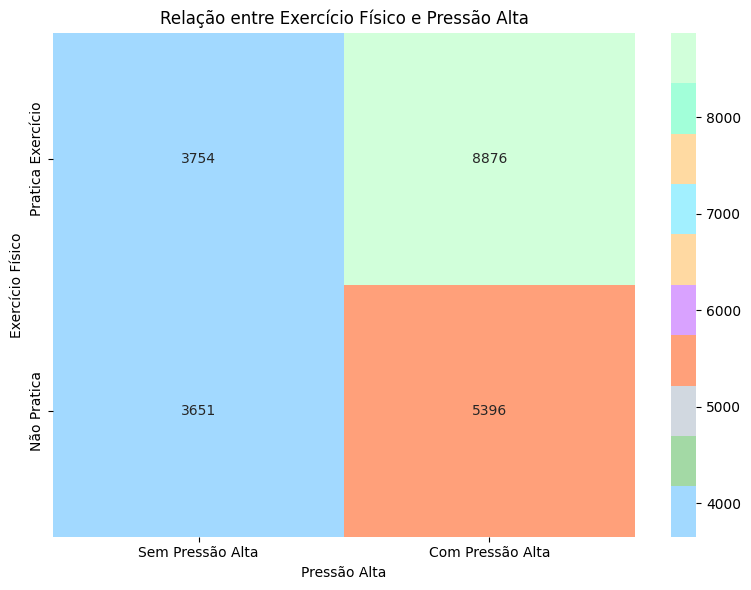

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Paleta personalizada
cores_claras = [
    '#A2D9FF', '#A3D9A5', '#D1D8E0', '#FFA07A', '#D9A2FF',
    '#FFD9A2', '#A2F0FF', '#FFDAA2', '#A2FFD9', '#D1FFDA'
]
cmap_personalizado = ListedColormap(cores_claras)

# Filtrar os dados para excluir casos desconhecidos (777)
df_filtrado = df_limpo[df_limpo['pressao_alta'] != 777]

# Agrupar os dados filtrados
physical_activity_blood_pressure = df_filtrado.groupby(['exercicio_físico', 'pressao_alta']).size().unstack(fill_value=0)

# Renomear os índices e colunas para melhor leitura
physical_activity_blood_pressure.index = ['Pratica Exercício', 'Não Pratica']
physical_activity_blood_pressure.columns = ['Sem Pressão Alta', 'Com Pressão Alta']

# Criar o heatmap com paleta personalizada
plt.figure(figsize=(8, 6))
sns.heatmap(physical_activity_blood_pressure, annot=True, fmt='d', cmap=cmap_personalizado, cbar=True)

# Título e rótulos
plt.title('Relação entre Exercício Físico e Pressão Alta')
plt.xlabel('Pressão Alta')
plt.ylabel('Exercício Físico')

plt.tight_layout()
plt.savefig('relacao_exercico_pressao.png', dpi=300)
plt.show()


## Summarize Findings

### Subtask:
Present the findings from the analysis in a clear and understandable format.

**Reasoning**:
Based on the previous analysis, summarize the key findings regarding physical activity by age group, the prevalence of high blood pressure by age group, the relationship between physical activity and high blood pressure, and the insights from the correlation matrix.

### Resumo das Descobertas:

Com base na análise dos dados, podemos destacar os seguintes pontos:

**Atividade Física por Faixa Etária:**
* A distribuição da prática de atividade física varia entre as faixas etárias, com diferentes proporções de pessoas que praticam ou não exercícios.
* Os tipos de exercícios mais prevalentes também mudam de acordo com a faixa etária, como observado na tabela de `exercise_type_by_age`. Por exemplo, alguns exercícios podem ser mais comuns em grupos mais jovens e outros em grupos mais velhos.

**Pressão Alta por Faixa Etária:**
* A prevalência de pressão alta aumenta com a idade, sendo mais comum nas faixas etárias mais velhas, como mostrado na tabela `blood_pressure_by_age`.

**Relação entre Atividade Física e Pressão Alta:**
* A análise da relação entre atividade física e pressão alta (`physical_activity_blood_pressure`) indica a quantidade de pessoas que praticam exercícios e têm ou não pressão alta. É possível comparar esses números para observar se há uma tendência.
* Ao analisar os tipos de exercícios praticados por pessoas com pressão alta (`exercise_type_high_bp`), pudemos identificar quais atividades são mais frequentes nesse grupo. O valor '0' em 'qual_exercicio' representa as pessoas que não praticam exercício.

**Matriz de Correlação:**
* A matriz de correlação (`correlation_matrix`) mostra a força e a direção da relação linear entre as variáveis numéricas selecionadas (`idade`, `exercicio_físico`, `qual_exercicio`, `pressao_alta`). Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente, enquanto valores próximos de 0 indicam pouca ou nenhuma correlação linear.

## Generate Correlation Matrix

### Subtask:
Calculate and visualize a correlation matrix for relevant numerical columns in the dataset to understand the relationships between different variables, including age, physical activity indicators (if numerical), and blood pressure.

**Reasoning**:
Select the relevant numerical columns from the DataFrame, calculate the correlation matrix, and then visualize it using a heatmap for better interpretation.

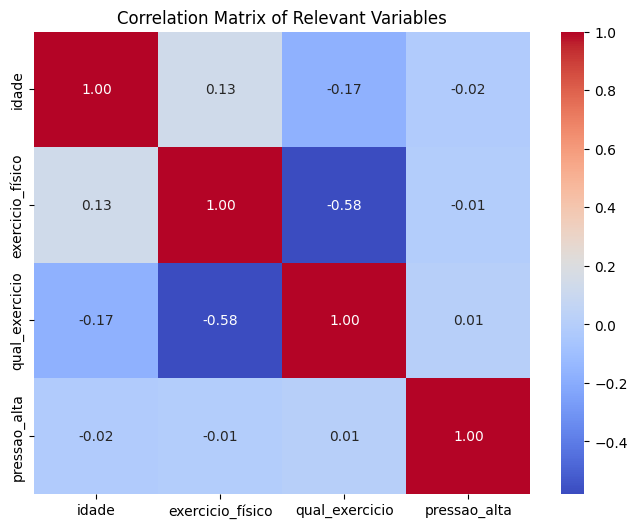

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns
df_relevant = df_limpo[['idade', 'exercicio_físico', 'qual_exercicio', 'pressao_alta']]

# Calculate the correlation matrix
correlation_matrix = df_relevant.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Variables')
plt.show()

**Reasoning**:
Filter the DataFrame to include only individuals with high blood pressure and then group by 'qual_exercicio' to count the occurrences of each exercise type within this subset.

Top 10 tipos de exercício praticados por pessoas com pressão alta:


qual_exercicio
NaN                                                3651
caminhada tradicional                              1955
musculação                                          437
ginástica em geral (alongamento, pilates, ioga)     319
outros                                              224
bicicleta (inclui ergométrica)                      189
hidroginástica                                      171
corrida (cooper)                                    103
caminhada em esteira                                 85
ginástica aeróbica (spinning, step, jump)            80
dtype: int64

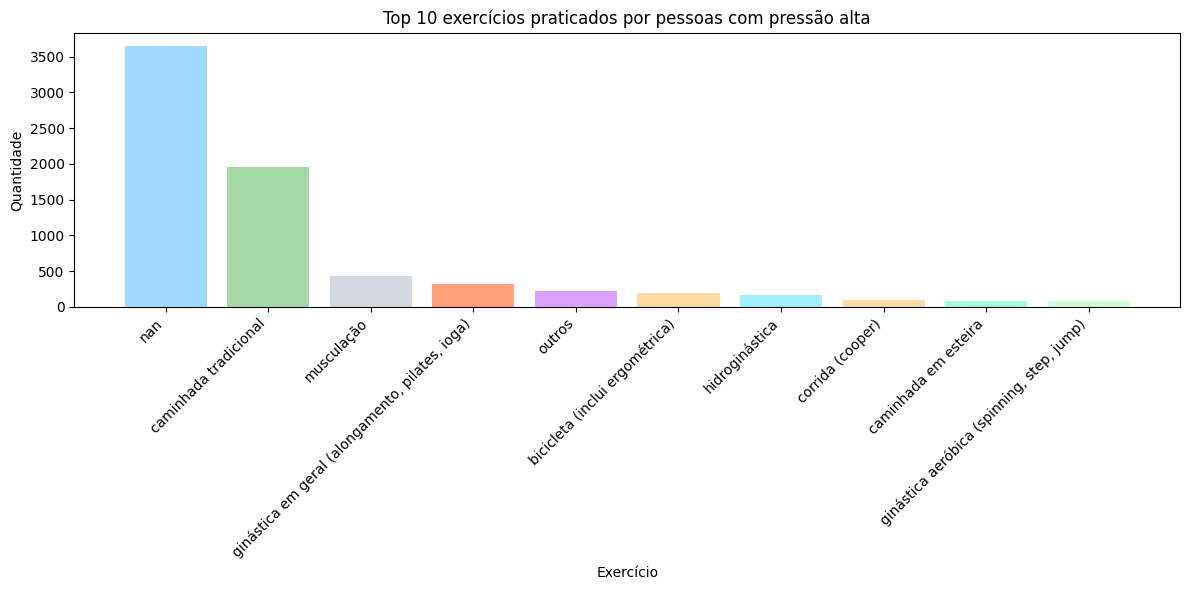

In [56]:
# Paleta de cores claras
cores_claras = [
    '#A2D9FF', '#A3D9A5', '#D1D8E0', '#FFA07A', '#D9A2FF',
    '#FFD9A2', '#A2F0FF', '#FFDAA2', '#A2FFD9', '#D1FFDA'
]

# Dicionário de códigos para nomes reais
codigo_para_exercicio = {
    1: "caminhada tradicional",
    2: "caminhada em esteira",
    3: "corrida (cooper)",
    4: "corrida em esteira",
    5: "musculação",
    6: "ginástica aeróbica (spinning, step, jump)",
    7: "hidroginástica",
    8: "ginástica em geral (alongamento, pilates, ioga)",
    9: "natação",
    10: "artes marciais e luta (jiu-jitsu, karatê, judô, boxe, muay thai, capoeira)",
    11: "bicicleta (inclui ergométrica)",
    12: "futebol/futsal",
    13: "basquetebol",
    14: "voleibol/futevolei",
    15: "tênis",
    16: "dança (balé, dança de salão, dança do ventre)",
    17: "outros"
}

# Filtrar apenas quem tem pressão alta
df_pressao_alta = df_limpo[df_limpo['pressao_alta'] == 1].copy()

# Agrupar e selecionar os 10 principais tipos de exercício
exercise_type_high_bp = df_pressao_alta.groupby('qual_exercicio').size().sort_values(ascending=False).head(10)

# Substituir códigos pelos nomes reais
exercise_type_high_bp.index = exercise_type_high_bp.index.map(codigo_para_exercicio)

# Exibir tabela
print("Top 10 tipos de exercício praticados por pessoas com pressão alta:")
display(exercise_type_high_bp)

# Plotar gráfico com nomes reais no eixo X
plt.figure(figsize=(12, 6))
plt.bar(
    range(len(exercise_type_high_bp)),
    exercise_type_high_bp.values,
    color=cores_claras[:len(exercise_type_high_bp)]
)
plt.title('Top 10 exercícios praticados por pessoas com pressão alta')
plt.xlabel('Exercício')
plt.ylabel('Quantidade')
plt.xticks(range(len(exercise_type_high_bp)), labels=exercise_type_high_bp.index, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('exercicio_praticado_pressao_real.png', dpi=300)
plt.show()


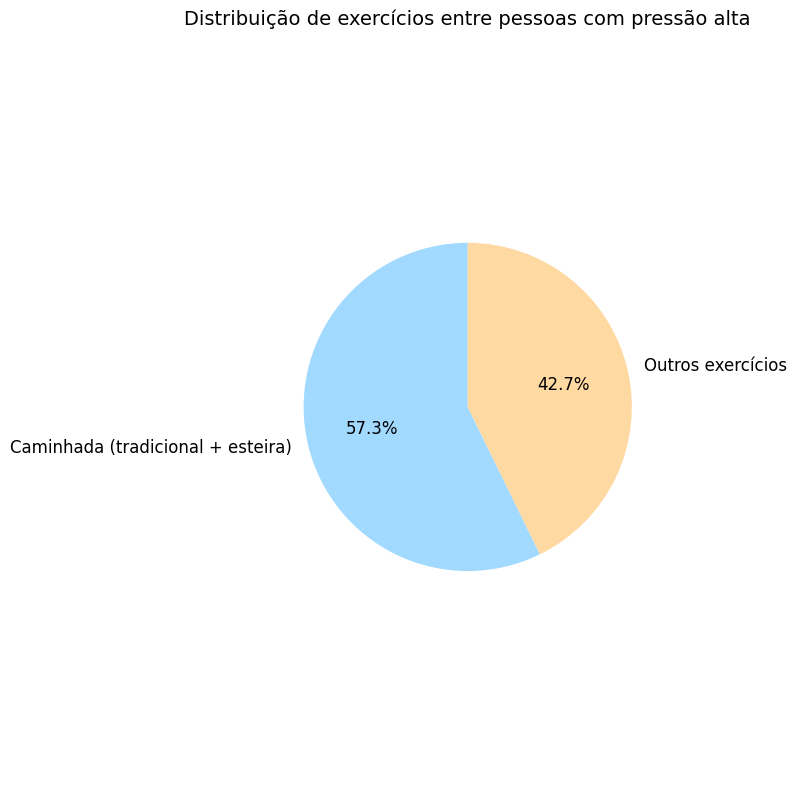

In [60]:
import matplotlib.pyplot as plt

# Contagens de exercícios (conforme seus dados)
caminhada_tradicional = 1955
caminhada_esteira = 85
musculacao = 437
ginastica_geral = 319
outros = 224
bicicleta = 189
hidroginastica = 171
corrida_cooper = 103
ginastica_aerobica = 80

# Somar caminhada total
caminhada_total = caminhada_tradicional + caminhada_esteira

# Somar todos os outros exercícios
outros_total = musculacao + ginastica_geral + outros + bicicleta + hidroginastica + corrida_cooper + ginastica_aerobica

# Total de registros válidos
total_exercicio = caminhada_total + outros_total

# Percentuais
percentual_caminhada = (caminhada_total / total_exercicio) * 100
percentual_outros = (outros_total / total_exercicio) * 100

# Dados para o gráfico
labels = ['Caminhada (tradicional + esteira)', 'Outros exercícios']
sizes = [percentual_caminhada, percentual_outros]
cores = ['#A2D9FF', '#FFD9A2']

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    textprops={'fontsize': 12}
)
plt.title('Distribuição de exercícios entre pessoas com pressão alta', fontsize=14)
plt.axis('equal')  # Para deixar a pizza redonda
plt.tight_layout()
plt.show()
